
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Deep Learning - HW4 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 <br>
<font color=696880 size=4>
    Niloufar Abbasi 

____

# Emotion Recognition with Recurrent Neural Networks


---

## **Introduction**

In this task, you will implement a Recurrent Neural Network (RNN) to perform tweet emotion recognition. The goal is to classify tweets into one of six basic emotions: 
- **0: sadness**
- **1: joy**
- **2: love**
- **3: anger**
- **4: fear**
- **5: surprise**

We will be using a dataset of tweets, where each tweet has been labeled with one of these emotions. Throughout this notebook, you will follow step-by-step instructions to build and train your model. As you progress, you'll complete the provided TODO sections by filling in the necessary code and functions.

By the end of this exercise, you will:
- Understand how to preprocess text data for use in RNN models.
- Build and train a model using Pytorch.
- Evaluate the performance of your model on the test set.

---


---

## Task 1: Enter Your Information

Before we begin, please enter your **student ID** and **name** in the code section below.

Make sure to replace the placeholders with your actual information.

---

In [1]:
#########################################
# TODO: Enter your personal information #
#########################################

student_name = "Parsa Hatami"  # Replace with your name
student_id   = 400100962  # Replace with your student ID

print("Your name:", student_name)
print("Your student ID:", student_id)

Your name: Parsa Hatami
Your student ID: 400100962


---

## Task 2: Setup and Imports

In this task, we'll be preparing our environment by importing the necessary libraries. Please run the cells below to set everything up. If any library is missing on your end, make sure to install it.

### Instructions:
1. **Run the cells** to install any required packages and import the necessary libraries.
2. If any library is not installed in your environment, use `!pip install <library_name>` to install it.
---

In [1]:
!pip install datasets

Required Libraries:

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datasets import load_dataset

%matplotlib inline

#####################################################################
# TODO: Add any additional libraries you may need for your analysis #
#####################################################################
 
# You can add your libraries here

### Additional Functions

The following functions have been provided to help you visualize the results of your model training. These will allow you to analyze both the model's performance over time (through the training history) and how well it performs on individual predictions (through a confusion matrix).

1. **`plot_history(hist)`**: This function takes the training history object (`hist`) from your model and plots both the accuracy and loss over the number of epochs for both training and validation sets. It provides an easy way to visually track the model's learning progress and performance.

2. **`visualize_confusion_matrix(actual_labels, predicted_labels, classes)`**: After making predictions with your model, you can use this function to plot a confusion matrix. It shows the accuracy of your model across each class, helping to identify areas where the model is performing well and where it might be struggling. The matrix is normalized to make comparisons easier.

These functions are for your convenience, you can directly use them after running your model to visualize the results.


In [2]:
# Functions to visualize training history and confusion matrix
def plot_history(hist):
    epochs = len(hist.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs), hist.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs), hist.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs), hist.history.get('loss'), label='Training')
    plt.plot(range(0, epochs), hist.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def visualize_confusion_matrix(actual_labels, predicted_labels, classes):

    cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


---

## Task 3: Importing Data

In this task, we will

- import the Tweet Emotion dataset

- create training, validation, and test sets
    
- extract the tweets and their corresponding labels for further analysis

---

In [3]:
dataset = load_dataset('emotion')
dataset

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
# Display the first few samples
print(dataset['train'][0:5])  # Adjust 'train' to 'test' or other splits if necessary

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [5]:
###########################################################################
# TODO: Create variables for the training, validation, and test datasets. #
###########################################################################

training = dataset['train']
validation = dataset['validation']
test = dataset['test']

In [6]:
########################################################################################################
# TODO:                                                                                                #
# Implement the `extract_tweets_labels` function to iterate over the provided dataset.                 #
# Within this function, extract the tweet text and their corresponding labels into two separate lists. #
# Then, call this function with the training dataset to obtain the tweets and labels,                  #
# ensuring proper data handling for subsequent analysis.                                               #
########################################################################################################

def extract_tweets_labels(data):
    tweets = [item['text'] for item in data]
    labels = [item['label'] for item in data]
    return tweets, labels

tweets, labels = extract_tweets_labels(training)

print(f"First tweet: {tweets[0]}")
print(f"First label: {labels[0]}")


First tweet: i didnt feel humiliated
First label: 0


---

## Task 4: Tokenization of Tweets

In this section, we will focus on the tokenization of the tweets in the dataset. Tokenization is a crucial step in natural language processing (NLP) that involves breaking down text into smaller units, such as words or subwords. This process enables the model to better understand and analyze the text data.

### Objectives:
1. Implement a tokenizer to convert the tweet texts into tokens.
2. Ensure the tokenization process handles various aspects of the text, such as punctuation and special characters.

By the end of this task, you will have a set of tokenized tweets ready for further processing in your NLP pipeline.

---

In [8]:
###############################################################################################################################################
# TODO: Tokenization of Tweets                                                                                                                #
# 1. Select a Tokenization Method: Choose a suitable tokenization method to preprocess the tweets.                                            #                                 
# Ensure that the tokenization handles special characters and maintains the integrity of the text data.                                       #
# 2. Implement the Tokenizer: Once you have selected a method, implement the tokenizer to convert the tweet texts into sequences of tokens.   #
# 3. Test the Tokenization:                                                                                                                   #
# Verify the functionality of your tokenizer by applying it to a sample tweet from the dataset and displaying the resulting tokenized output. #
###############################################################################################################################################

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

sample_tweet = tweets[0]
tokenized_output = tokenizer.tokenize(sample_tweet)
encoded_output = tokenizer.encode(sample_tweet, add_special_tokens=True)

print("Original Tweet:", sample_tweet)
print("Tokenized Output:", tokenized_output)
print("Encoded Output (IDs):", encoded_output)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Original Tweet: i didnt feel humiliated
Tokenized Output: ['i', 'didn', '##t', 'feel', 'humiliated']
Encoded Output (IDs): [101, 1045, 2134, 2102, 2514, 26608, 102]


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


---

## Task 5: Padding and Truncating Sequences

In this task, we will prepare the tokenized tweets for model training by checking their lengths and creating padded sequences.

1. **Checking the Length of the Tweets**
   - Analyze the distribution of tweet lengths to understand the range of token counts in the dataset.

2. **Creating Padded Sequences**
   - After tokenizing the tweets, sequences of different lengths must be adjusted to a uniform length to facilitate training.

---


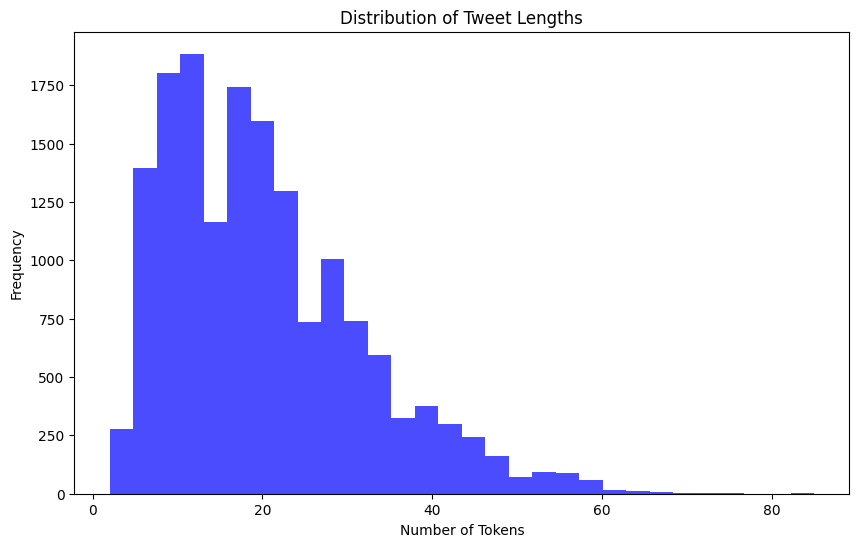

Selected maximum length for padding/truncation: 50


In [9]:
#####################################################################################################################################################
# TODO:                                                                                                                                             #
# Implement code to calculate the lengths of the tweets and visualize the distribution using a histogram. Use an appropriate visualization library. #
# After visualizing the distribution, determine a suitable maximum length for padding and truncating the sequences based on your findings.          #
#####################################################################################################################################################

tweet_lengths = [len(tokenizer.tokenize(tweet)) for tweet in tweets]

plt.figure(figsize=(10, 6))
plt.hist(tweet_lengths, bins=30, color="blue", alpha=0.7)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

max_length = 50
print(f"Selected maximum length for padding/truncation: {max_length}")

In [11]:
############################################################################################################
# TODO: Define a function to convert the tokenized tweets into sequences and apply padding and truncation. # 
# Use your determined maximum length for padding the sequences.                                            #
############################################################################################################
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_sequences(tokenizer, tweets, max_length):
    sequences = [tokenizer.encode(tweet, add_special_tokens=True) for tweet in tweets]
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post", truncating="post")
    return padded_sequences

padded_train_sequences = get_sequences(tokenizer, tweets, max_length)

print("First padded sequence:", padded_train_sequences[0])

First padded sequence: [  101  1045  2134  2102  2514 26608   102     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]


---

## Task 6: Analyzing Label Distribution

1. Checking the distribution of labels.
2. Addressing any class imbalance using appropriate techniques.

Note:

(**Providing a clear explanation of the chosen method to address the imbalance and how it will improve the model’s performance is critical.** Without handling class imbalance properly, the model could achieve a high accuracy by focusing on the majority class, but it may perform poorly on the minority class, which would result in misleading metrics and reduced generalization.

Hence, it is important to not only implement an appropriate solution but also **justify** why the selected approach is effective for the given task.)

---

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


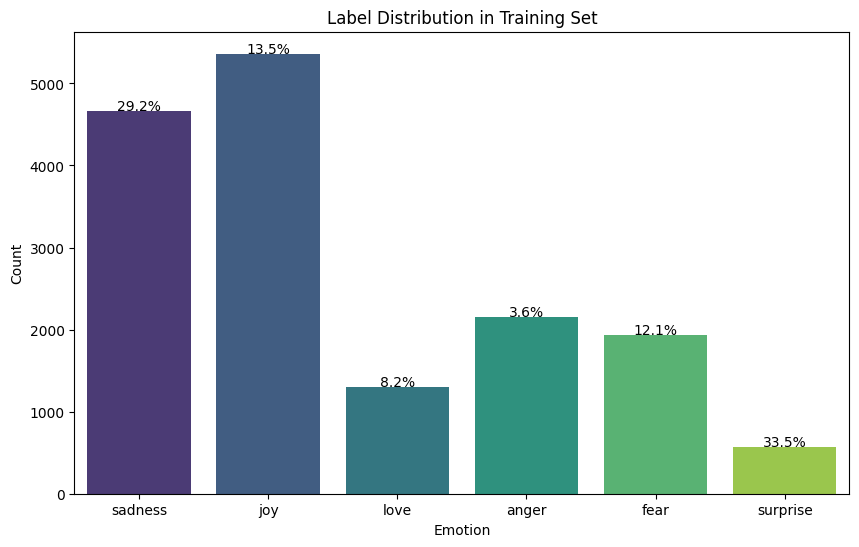

Label counts: Counter({1: 5362, 0: 4666, 3: 2159, 4: 1937, 2: 1304, 5: 572})


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


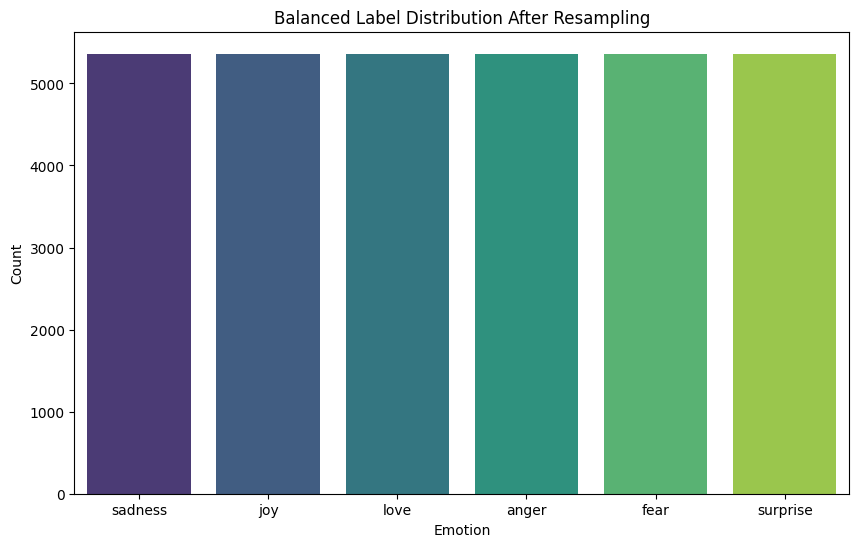

New label counts: Counter({0: 5362, 3: 5362, 2: 5362, 5: 5362, 4: 5362, 1: 5362})


In [13]:
##########################################################################################################################
# TODO: Analyze the distribution of labels in the training set. (visualize it in a perfect way)                          #
# Determine if there is any class imbalance.                                                                             #
# If you observe any imbalance, apply one of the techniques you have learned throughout the course to address the issue. #
##########################################################################################################################
from collections import Counter
import seaborn as sns

label_counts = Counter(labels)

class_names = ["sadness", "joy", "love", "anger", "fear", "surprise"]

total_labels = sum(label_counts.values())
percentages = [(count / total_labels) * 100 for count in label_counts.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis")
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.title("Label Distribution in Training Set")
plt.xlabel("Emotion")
plt.ylabel("Count")

for i, percentage in enumerate(percentages):
    plt.text(x=i, y=label_counts[i] + 5, s=f"{percentage:.1f}%", ha='center')

plt.show()

print("Label counts:", label_counts)

from imblearn.over_sampling import RandomOverSampler

labels_np = np.array(labels)

resampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

tweets_resampled, labels_resampled = resampler.fit_resample(np.array(tweets).reshape(-1, 1), labels_np)

tweets_resampled = tweets_resampled.flatten().tolist()

new_label_counts = Counter(labels_resampled)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(new_label_counts.keys()), y=list(new_label_counts.values()), palette="viridis")
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.title("Balanced Label Distribution After Resampling")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

print("New label counts:", new_label_counts)

---

## Task 7: Creating the Model

Design and implement a recurrent neural network for the task. You may utilize a sequential architecture like RNN or GRU to enhance the model's performance.

Build and compile your model using Pytorch.

**Once the model is created, summarize its structure to verify the design.**

---

In [29]:
import torch
import torch.nn as nn

#########################################################################################################
# TODO:                                                                                                 #
# Create a recurrent neural network model for the task.                                                 #
# (Suggestion: Implement a Bidirectional LSTM architecture to process the input sequences effectively.) #
# Once the model is created, summarize its structure to verify the design.                              #
#########################################################################################################

class EmotionClassifier(nn.Module):
    def __init__(self, 
                 vocab_size,    
                 embedding_dim,  
                 hidden_dim,   
                 output_dim,
                 n_layers=1,     
                 bidirectional=True, 
                 dropout=0.5):
        super(EmotionClassifier, self).__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.lstm = nn.LSTM(input_size=embedding_dim, 
                            hidden_size=hidden_dim, 
                            num_layers=n_layers,
                            batch_first=True, 
                            bidirectional=bidirectional)
        
        self.dropout = nn.Dropout(dropout)
        
        lstm_output_dim = hidden_dim * 2 if bidirectional else hidden_dim
        self.fc = nn.Linear(lstm_output_dim, output_dim)
        
    def forward(self, x):
        """
        x: [batch_size, seq_length]
        """
        embedded = self.embedding(x)

        output, (hidden, cell) = self.lstm(embedded)
        
        if self.lstm.bidirectional:

            hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            hidden = hidden[-1,:,:]
        
        hidden = self.dropout(hidden)
        
        out = self.fc(hidden)
        
        return out

vocab_size = 30522  
embedding_dim = 128
hidden_dim = 128
output_dim = 6

model = EmotionClassifier(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=hidden_dim,
    output_dim=output_dim,
    n_layers=1,
    bidirectional=True,
    dropout=0.5
)

print(model)  # Summarize the model architecture


EmotionClassifier(
  (embedding): Embedding(30522, 128)
  (lstm): LSTM(128, 128, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=256, out_features=6, bias=True)
)


---

## Task 8: Training the Model

In this task, you will prepare a validation set and train your model using the training data.

1. Prepare the validation set by extracting tweets and labels, and convert them into sequences using the tokenizer.
2. Train the model on the training data.
3. Ensure that you implement **Early Stopping** to prevent overfitting and enhance efficiency.

Make sure to monitor the validation accuracy during training and adjust the parameters as necessary.

---

In [36]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer
from imblearn.over_sampling import RandomOverSampler

training = dataset['train']
validation = dataset['validation']
test = dataset['test']

def extract_tweets_labels(data):
    """
    Given a dataset split (e.g., training), extracts the list of tweet texts
    and labels, returning them as separate lists.
    """
    tweets_ = [item['text'] for item in data]
    labels_ = [item['label'] for item in data]
    return tweets_, labels_

tweets, labels = extract_tweets_labels(training)

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_sequences(tokenizer, tweets_list, max_length):
    """
    Tokenizes and encodes a list of tweets, then pads/truncates
    them to max_length using post-padding and post-truncation.
    Returns a 2D NumPy array of shape [num_samples, max_length].
    """
    sequences = [tokenizer.encode(t, add_special_tokens=True) for t in tweets_list]
    padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
    return padded

max_length = 50

labels_np = np.array(labels)

resampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

tweets_resampled, labels_resampled = resampler.fit_resample(
    np.array(tweets).reshape(-1, 1),
    labels_np
)

tweets_resampled = tweets_resampled.flatten().tolist()


padded_train_sequences = get_sequences(tokenizer, tweets_resampled, max_length)

# Convert to PyTorch tensors
train_inputs = torch.tensor(padded_train_sequences, dtype=torch.long)
train_labels_tensor = torch.tensor(labels_resampled, dtype=torch.long)

print("Train input shape:", train_inputs.shape)  
print("Train label shape:", train_labels_tensor.shape)

# Create dataset & dataloader
train_dataset = TensorDataset(train_inputs, train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_tweets, val_labels = extract_tweets_labels(validation)

# Tokenize validation tweets
padded_val_sequences = get_sequences(tokenizer, val_tweets, max_length)

# Convert to tensors
val_inputs = torch.tensor(padded_val_sequences, dtype=torch.long)
val_labels_tensor = torch.tensor(val_labels, dtype=torch.long)

# Create dataset & dataloader
val_dataset = TensorDataset(val_inputs, val_labels_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

class EmotionClassifier(nn.Module):
    def __init__(self, 
                 vocab_size,
                 embedding_dim,
                 hidden_dim,
                 output_dim,
                 n_layers=1,
                 bidirectional=True,
                 dropout=0.5):
        super(EmotionClassifier, self).__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.lstm = nn.LSTM(input_size=embedding_dim, 
                            hidden_size=hidden_dim, 
                            num_layers=n_layers,
                            batch_first=True, 
                            bidirectional=bidirectional)
        
        self.dropout = nn.Dropout(dropout)
        
        lstm_output_dim = hidden_dim * 2 if bidirectional else hidden_dim
        self.fc = nn.Linear(lstm_output_dim, output_dim)
        
    def forward(self, x):
        embedded = self.embedding(x)
        output, (hidden, cell) = self.lstm(embedded)
        
        if self.lstm.bidirectional:
            hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            hidden = hidden[-1,:,:]
        
        hidden = self.dropout(hidden)
        out = self.fc(hidden)
        return out

vocab_size = tokenizer.vocab_size
embedding_dim = 128
hidden_dim = 128
output_dim = 6

model = EmotionClassifier(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=hidden_dim,
    output_dim=output_dim,
    n_layers=1,
    bidirectional=True,
    dropout=0.5
)

print(model)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 10
patience = 3
best_val_acc = 0.0
patience_counter = 0
best_model_weights = None

class HistObject:
    def __init__(self):
        self.history = {
            'loss': [],
            'val_loss': [],
            'accuracy': [],
            'val_accuracy': []
        }

hist = HistObject()

for epoch in range(num_epochs):

    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (input_ids, labels_batch) in enumerate(train_loader):
        input_ids = input_ids.to(device)
        labels_batch = labels_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids)
        loss = criterion(outputs, labels_batch)

        # Backward + Optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Track training accuracy on the fly
        _, predicted = torch.max(outputs, dim=1)
        correct_train += (predicted == labels_batch).sum().item()
        total_train += labels_batch.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    model.eval()
    correct_val = 0
    total_val = 0
    val_loss_accum = 0.0

    with torch.no_grad():
        for val_input_ids, val_labels_batch in val_loader:
            val_input_ids = val_input_ids.to(device)
            val_labels_batch = val_labels_batch.to(device)

            val_outputs = model(val_input_ids)
            val_loss = criterion(val_outputs, val_labels_batch)

            val_loss_accum += val_loss.item()

            _, predicted_val = torch.max(val_outputs, dim=1)
            correct_val += (predicted_val == val_labels_batch).sum().item()
            total_val += val_labels_batch.size(0)

    avg_val_loss = val_loss_accum / len(val_loader)
    val_acc = correct_val / total_val

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {avg_train_loss:.4f} "
          f"Train Acc: {train_acc:.4f} "
          f"Val Loss: {avg_val_loss:.4f} "
          f"Val Acc: {val_acc:.4f}")


    hist.history['loss'].append(avg_train_loss)
    hist.history['val_loss'].append(avg_val_loss)
    hist.history['accuracy'].append(train_acc)
    hist.history['val_accuracy'].append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        patience_counter = 0
        best_model_weights = copy.deepcopy(model.state_dict())
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

if best_model_weights is not None:
    model.load_state_dict(best_model_weights)
    print(f"\nRestored model weights from epoch with best validation accuracy: {best_val_acc:.4f}")
else:
    print("\nNo improvement found; model remains at last epoch's weights.")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Train input shape: torch.Size([32172, 50])
Train label shape: torch.Size([32172])
EmotionClassifier(
  (embedding): Embedding(30522, 128)
  (lstm): LSTM(128, 128, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=256, out_features=6, bias=True)
)
Epoch [1/10] Train Loss: 1.2761 Train Acc: 0.4588 Val Loss: 1.0112 Val Acc: 0.6070
Epoch [2/10] Train Loss: 0.5131 Train Acc: 0.8232 Val Loss: 0.5311 Val Acc: 0.8270
Epoch [3/10] Train Loss: 0.2355 Train Acc: 0.9278 Val Loss: 0.4357 Val Acc: 0.8580
Epoch [4/10] Train Loss: 0.1423 Train Acc: 0.9581 Val Loss: 0.4663 Val Acc: 0.8735
Epoch [5/10] Train Loss: 0.0942 Train Acc: 0.9726 Val Loss: 0.5039 Val Acc: 0.8725
Epoch [6/10] Train Loss: 0.0761 Train Acc: 0.9787 Val Loss: 0.4564 Val Acc: 0.8760
Epoch [7/10] Train Loss: 0.0589 Train Acc: 0.9831 Val Loss: 0.4859 Val Acc: 0.8820
Epoch [8/10] Train Loss: 0.0430 Train Acc: 0.9881 Val Loss: 0.5005 Val Acc: 0.8890
Epoch [9/10] Train Loss: 0.0413

---

## Task 9: Evaluating the Model

In this task, you will evaluate the performance of your model on the test set and visualize the training history. You will also analyze the model’s predictions on both individual and complete test samples.

### Steps:
1. Visualize the loss and accuracy over the training epochs.
2. Prepare and preprocess the test data using functions from Task 2.
3. Evaluate the model on the test set and examine individual predictions.
4. Analyze the overall predictions and display a confusion matrix.

---

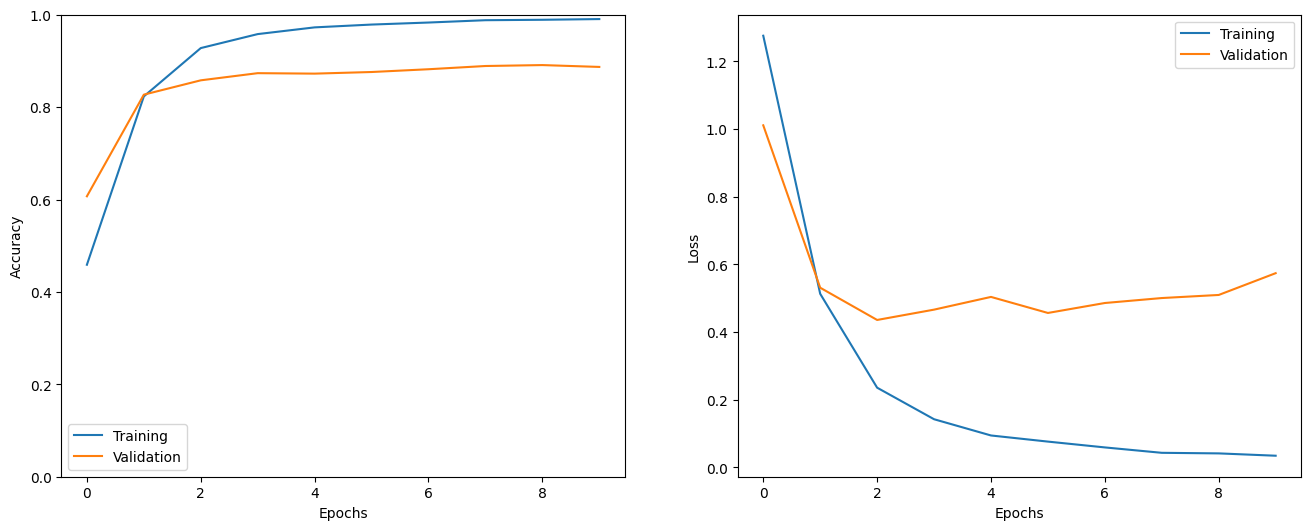

In [37]:
###############################################################################################################
# TODO: Visualize the training history by plotting the loss and accuracy over the epochs to assess model      #
#       performance. Use an appropriate visualization method to ensure clarity and effectiveness.             #
#       you can use function implemented in Task 2 for your visualizations                                    #
###############################################################################################################

# Your code for visualizing the training history goes here

plot_history(hist)

In [38]:
###############################################################################################################
# TODO: Prepare the test set by extracting the tweets and labels, then convert the tweets into sequences using #
#       the tokenizer. Ensure the format matches that of the training and validation sets.                     #
###############################################################################################################

# Your code for preparing the test set goes here

test_tweets, test_labels = extract_tweets_labels(test)
padded_test_sequences = get_sequences(tokenizer, test_tweets, max_length)

test_inputs = torch.tensor(padded_test_sequences, dtype=torch.long)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

test_dataset = TensorDataset(test_inputs, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Number of test samples: {len(test_dataset)}")

Number of test samples: 2000


In [39]:
###############################################################################################################
# TODO: Evaluate the model's performance on the test set. Print the accuracy and loss, and review individual   #
#       predictions to understand how the model is performing on unseen data.                                 #
###############################################################################################################

# Your code for evaluating the model and reviewing predictions goes here

model.eval()
test_loss = 0.0
correct = 0
total = 0
sample_predictions = []

with torch.no_grad():
    for batch_idx, (batch_inputs, batch_labels) in enumerate(test_loader):
        batch_inputs = batch_inputs.to(device)
        batch_labels = batch_labels.to(device)

        outputs = model(batch_inputs)
        
        loss = criterion(outputs, batch_labels)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs, dim=1)
        correct += (predicted == batch_labels).sum().item()
        total += batch_labels.size(0)
        
        # Collect some sample predictions for manual inspection
        if batch_idx < 1:  # e.g., first batch
            # Move to CPU for indexing
            predicted_cpu = predicted.cpu().numpy()
            labels_cpu = batch_labels.cpu().numpy()
            for i in range(len(batch_inputs)):
                if len(sample_predictions) < 5:  # store up to 5
                    sample_predictions.append({
                        "tweet": test_tweets[batch_idx * test_loader.batch_size + i],
                        "true_label": labels_cpu[i],
                        "pred_label": predicted_cpu[i]
                    })

test_loss /= len(test_loader)
test_acc = correct / total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}\n")

# Print sample predictions
for idx, sp in enumerate(sample_predictions):
    print(f"Sample #{idx+1}")
    print("Tweet     :", sp['tweet'])
    print("True Label:", sp['true_label'])
    print("Pred Label:", sp['pred_label'])
    print("-"*50)


Test Loss: 0.5406, Test Accuracy: 0.8765

Sample #1
Tweet     : im feeling rather rotten so im not very ambitious right now
True Label: 0
Pred Label: 0
--------------------------------------------------
Sample #2
Tweet     : im updating my blog because i feel shitty
True Label: 0
Pred Label: 0
--------------------------------------------------
Sample #3
Tweet     : i never make her separate from me because i don t ever want her to feel like i m ashamed with her
True Label: 0
Pred Label: 0
--------------------------------------------------
Sample #4
Tweet     : i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
True Label: 1
Pred Label: 1
--------------------------------------------------
Sample #5
Tweet     : i was feeling a little vain when i did this one
True Label: 0
Pred Label: 0
--------------------------------------------------


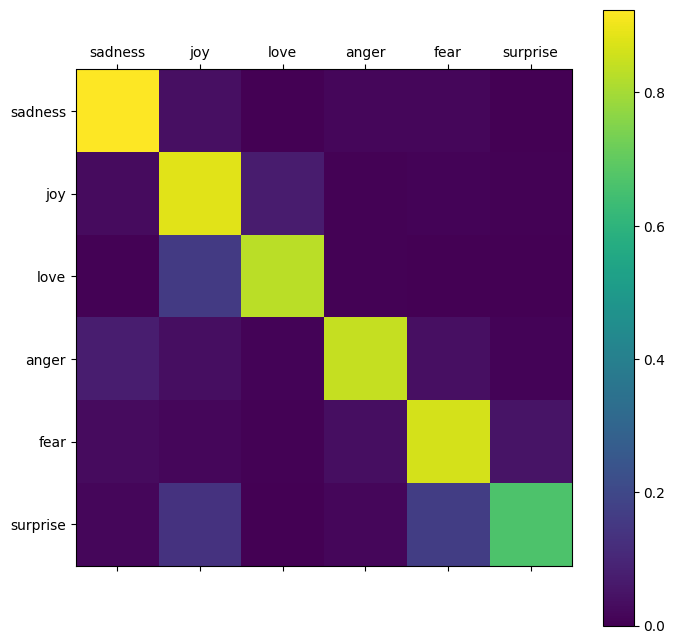

In [40]:
###############################################################################################################
# TODO: Generate predictions for all test samples and analyze the model's overall performance. Display the     #
#       confusion matrix to visualize the differences between true and predicted labels, helping to interpret  #
#       the model's classification results.                                                                   #
###############################################################################################################

# Your code for generating predictions and displaying the confusion matrix goes here

from sklearn.metrics import classification_report
import numpy as np

model.eval()

all_preds = []
all_true = []

with torch.no_grad():
    for batch_inputs, batch_labels in test_loader:
        batch_inputs = batch_inputs.to(device)
        batch_labels = batch_labels.to(device)

        outputs = model(batch_inputs)
        _, predicted = torch.max(outputs, dim=1)

        all_preds.extend(predicted.cpu().numpy())
        all_true.extend(batch_labels.cpu().numpy())

all_preds = np.array(all_preds)
all_true = np.array(all_true)

class_names = ["sadness", "joy", "love", "anger", "fear", "surprise"]

# print("Classification Report:\n")
# print(classification_report(all_true, all_preds, target_names=class_names))

visualize_confusion_matrix(all_true, all_preds, classes=class_names)

# Final Analysis

After visualizing the confusion matrix based on your model’s predictions, analyze the results and provide insights into the model’s classification performance.

### **Question:**
<span style="font-size: 1.2em;">Which class seems to get confused with the class *love* the most?</span>

**Remember the class labels:**
- **0:** *Sadness*
- **1:** *Joy*
- **2:** *Love*
- **3:** *Anger*
- **4:** *Fear*
- **5:** *Surprise*

Reflect on the confusion matrix to answer this question and provide your reasoning for why this confusion might occur based on the emotional nature of the classes.


The class *love* (**2**) is most frequently confused with the class *joy* (**1**). This is evident from the relatively high value in the row corresponding to *love* and the column corresponding to *joy*. 

### **Reasoning:**
The confusion between *love* and *joy* can be attributed to the emotional similarity between these two classes. Both emotions often involve positive expressions and overlap in contexts where people express happiness, affection, and positive sentiments. For example:
- A tweet expressing "I love spending time with my family" might be labeled as *love*, but the model might classify it as *joy* due to the shared positivity in the tone.
- The dataset might also have limited examples or subtle differences in the linguistic representation of *love* and *joy*, making it challenging for the model to differentiate effectively.

Improving the classification for such similar classes might require:
1. Enriching the dataset with more examples that distinctly represent *love* and *joy*.
2. Incorporating context-sensitive models like attention mechanisms or using domain-specific pretrained embeddings to better understand subtle nuances between these classes.


# **Best regards.**